# <font color='black'>Project Title : ***Netflix Price Predction*** </font>

# <font color='blue'> Description</font>


We will use historical stock price data for Netflix to train machine learning models to predict future stock prices. The dataset includes columns such as Date, Open, High, Low, Close, Adjusted Close (Adj Close), and Volume. The 'Close' price will be our target variable, as it represents the final trading price for each day and is a key metric for investors aiming to maximize profit by buying low and selling high. The other columns ('Open', 'High', 'Low', 'Adj Close', 'Volume') serve as input features since they influence the 'Close' price and can improve the model's predictive accuracy.

Why 'Close' Price?
The 'Close' price is crucial because it reflects the stock's final value at the end of the trading day, providing insight into the stock’s daily performance. This price is affected by daily fluctuations captured in the 'Open', 'High', 'Low', and 'Adj Close' prices, as well as the trading volume. Therefore, predicting the 'Close' price helps investors decide the optimal times to buy or sell.

By using these features, our model aims to accurately predict the future 'Close' price of Netflix, allowing for informed investment decisions.

![Netflix image](image2.jpg)




## <font color ='Green'>1) Loading Libraries</font>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
df=pd.read_csv("netflix.csv")

In [7]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400
3,2002-05-29,1.164286,1.164286,1.085714,1.103571,1.103571,6757800
4,2002-05-30,1.107857,1.107857,1.071429,1.071429,1.071429,10154200


In [8]:
df.shape # dataset has 5044 rows and 9 columns

(5044, 7)

**Observation:**
<font color='Red'>1) We have Total 5044 number of Rows and 9 Columns in the Dataset.</font>

## Data Preprocessing

<font color='orange'>**Data Preprocessing have some steps involved:**</font>

1)Loading and Inspecting the Data: Read data and check its structure.

2)Feature Engineering: Convert date column to datetime and extract useful features (year, month, day).

3)Cleaning Data: Remove unnecessary columns and check for missing values and duplicates.

4)Scaling and Normalization: Apply normalization to ensure that all features contribute equally to the model.

5)Data Splitting: Split the data into training and test sets to evaluate model performance.

## <font color ='Green'>2) Feature Engineering</font>
Extracts the 'year', 'month', and 'day' from the datetime object and stores them in new columns. This step allows you to use these temporal features as inputs for the prediction model.

In [13]:
df['Date'] = pd.to_datetime(df['Date'])
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day

In [14]:
df.head(3)
##Display the first 3 rows of the dataset to understand its structure and content.

,Date,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,2002-05-23,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002,5,23
1,2002-05-24,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002,5,24
2,2002-05-28,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,2002,5,28


In [15]:
##Remove the 'Date' column since it's no longer needed after extracting the year, month, and day information.
df.drop('Date',axis=1,inplace=True) 

In [16]:
df

,Open,High,Low,Close,Adj Close,Volume,year,month,day
0,1.156429,1.242857,1.145714,1.196429,1.196429,104790000,2002,5,23
1,1.214286,1.225000,1.197143,1.210000,1.210000,11104800,2002,5,24
2,1.213571,1.232143,1.157143,1.157143,1.157143,6609400,2002,5,28
3,1.164286,1.164286,1.085714,1.103571,1.103571,6757800,2002,5,29
4,1.107857,1.107857,1.071429,1.071429,1.071429,10154200,2002,5,30
...,...,...,...,...,...,...,...,...,...
5039,193.190002,195.250000,190.369995,195.190002,195.190002,8586000,2022,5,27
5040,196.179993,199.949997,190.800003,197.440002,197.440002,11398500,2022,5,31
5041,198.699997,202.740005,191.660004,192.910004,192.910004,8416200,2022,6,1
5042,192.020004,205.470001,191.720001,205.089996,205.089996,9623100,2022,6,2


### <font color='purple'> Checking Null Values</font>

In [18]:
#Checking for the null values
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
year         0
month        0
day          0
dtype: int64

In [19]:
#Count the number of duplicate rows to check data redundancy. A result of 0 indicates no duplicate records.
df.duplicated().sum()

0

In [20]:
df.info()#Display information about the dataset, including column data types and memory usage.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5044 entries, 0 to 5043
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5044 non-null   float64
 1   High       5044 non-null   float64
 2   Low        5044 non-null   float64
 3   Close      5044 non-null   float64
 4   Adj Close  5044 non-null   float64
 5   Volume     5044 non-null   int64  
 6   year       5044 non-null   int32  
 7   month      5044 non-null   int32  
 8   day        5044 non-null   int32  
dtypes: float64(5), int32(3), int64(1)
memory usage: 295.7 KB


**Observation:**
<font color='Red'>1)we have information about the dataset, including column data types and memory usage. </font>

In [22]:
#Generate descriptive statistics such as mean, standard deviation, min, and max values for each numerical column, providing insights into the data distribution.
df.describe()

,Open,High,Low,Close,Adj Close,Volume,year,month,day
count,5044.000000,5044.000000,5044.000000,5044.000000,5044.000000,5.044000e+03,5044.000000,5044.000000,5044.000000
mean,116.467981,118.237392,114.578719,116.456338,116.456338,1.653068e+07,2011.905630,6.545797,15.737708
std,168.740876,171.140864,166.119837,168.668232,168.668232,1.924487e+07,5.798402,3.423809,8.758690
min,0.377857,0.410714,0.346429,0.372857,0.372857,2.856000e+05,2002.000000,1.000000,1.000000
25%,3.955357,4.031072,3.885357,3.958571,3.958571,6.168225e+06,2007.000000,4.000000,8.000000
50%,25.819285,26.342143,25.455000,25.802856,25.802856,1.059135e+07,2012.000000,7.000000,16.000000
75%,155.762497,157.654998,153.944996,155.869999,155.869999,1.986552e+07,2017.000000,10.000000,23.000000
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.234140e+08,2022.000000,12.000000,31.000000


In [41]:
#Compute the correlation matrix to quantify the relationships between different numerical features.
corr = df.corr()

In [43]:
corr

,Open,High,Low,Close,Adj Close,Volume,year,month,day
Open,1.000000,0.999863,0.999853,0.999695,0.999695,-0.262560,0.814140,-0.004033,-0.003739
High,0.999863,1.000000,0.999815,0.999861,0.999861,-0.261281,0.814615,-0.004482,-0.003833
Low,0.999853,0.999815,1.000000,0.999856,0.999856,-0.264033,0.813706,-0.003523,-0.003572
Close,0.999695,0.999861,0.999856,1.000000,1.000000,-0.262548,0.814257,-0.004129,-0.003773
Adj Close,0.999695,0.999861,0.999856,1.000000,1.000000,-0.262548,0.814257,-0.004129,-0.003773
Volume,-0.262560,-0.261281,-0.264033,-0.262548,-0.262548,1.000000,-0.108797,-0.044664,0.032562
year,0.814140,0.814615,0.813706,0.814257,0.814257,-0.108797,1.000000,-0.072108,-0.006204
month,-0.004033,-0.004482,-0.003523,-0.004129,-0.004129,-0.044664,-0.072108,1.000000,-0.001500
day,-0.003739,-0.003833,-0.003572,-0.003773,-0.003773,0.032562,-0.006204,-0.001500,1.000000


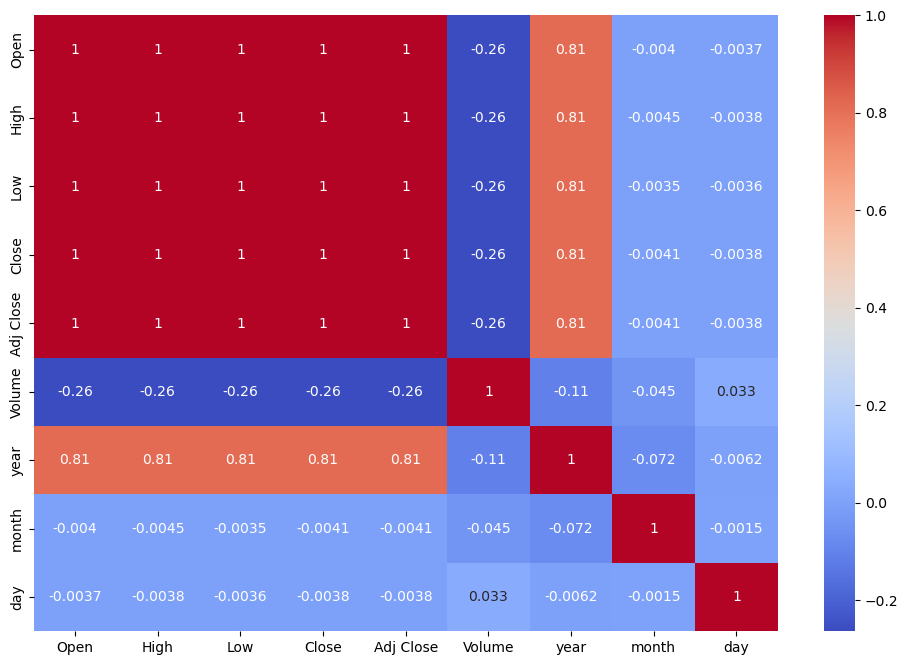

In [57]:
# Create a figure with a specified size
plt.figure(figsize=(12, 8))  # Width = 12 inches, Height = 8 inches

# Generate the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True)

# Show the plot
plt.show()

# <font color='blue'> Highly Correlated Columns:</font>

<font color='black'>1) Open and Adj Close: These columns are likely to have a strong positive correlation, as the opening price is often close to the adjusted closing price of the previous day.</font> 

<font color='black'>2) High and Low: These columns usually have a high correlation because they both depend on the daily price range.</font> 

<font color='black'>3) Close and Adj Close: Typically have a very high positive correlation since the adjusted close is a modified version of the close price. </font>

# <font color='blue'> Not Very Correlated Columns:</font>

<font color='black'>1) Volume and Low/High/Close: Trading volume (Volume) often does not correlate strongly with the stock prices (Low, High, Close), as volume represents the number of shares traded, which can be high or low regardless of the stock price.</font> 

<font color='black'>2) Day, Month, and Price Columns (Open, Close, etc.): These columns may show low correlation since the day or month of the year does not directly determine the stock price in most cases.</font>

**Observation:**

<font color='red'>1) The darker red or blue colors on the heatmap (using the 'coolwarm' color map) indicate stronger correlations (positive or negative).</font>  
<font color='red'>2) Lighter colors near white represent weaker correlations.</font>
